In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

from math import gamma
from functools import reduce

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

### Для построения графиков:

In [21]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [22]:
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

### Дирихле:

In [23]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

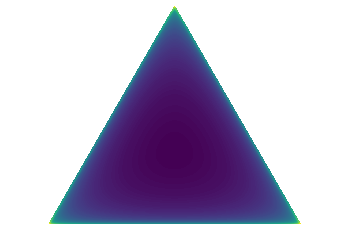

In [24]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

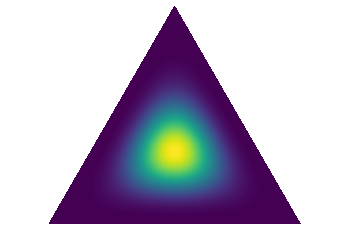

In [25]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

### Гумбель-Софтмакс:

In [26]:
class GumbelSoftmax(object):
    def __init__(self, s, t):
        self.s = np.array(s)
        self.t = t
        self.k = len(self.s) 
        self.coef = gamma(self.k)
    
    def pdf(self, x):
        from operator import mul
        return self.coef * np.power(self.t, self.k - 1) * np.power(self.s.dot(np.power(x, -self.t)), -self.k) * np.prod(np.power(x, -(self.t + 1)))

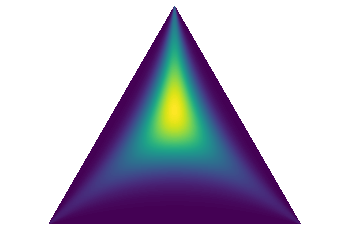

In [61]:
dist = GumbelSoftmax([1, 1, 3], 2)
draw_pdf_contours(dist)

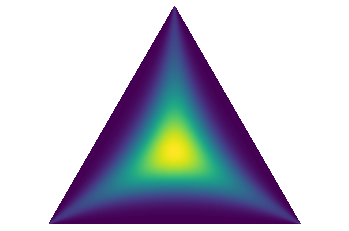

In [62]:
dist = GumbelSoftmax([5, 5, 5], 2)
draw_pdf_contours(dist)

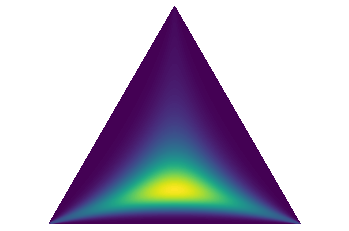

In [63]:
dist = GumbelSoftmax([5, 5, 1], 2)
draw_pdf_contours(dist)